In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Plotting from pandas DataFrames

Most of time, we will plotting from panda dataframes, not numpy arrays

* Line
* Scatter
* Bar
* Hist
* df.plot(subplots=True, figsize=(6, 6))

In [4]:
# make a dataframe 
sales_df = pd.read_csv("car-sales.csv")
sales_df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [3]:
sales_df.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

### Line Graph

In [5]:
# Format the Price column first
# convert from object to string - remove the $ symbols
# Note: - There are many ways to do this

sales_df["Price"] = sales_df["Price"].str.replace('[\$\,\.]', '')
sales_df

<ipython-input-5-ab082334d79b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  sales_df["Price"] = sales_df["Price"].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [6]:
# Two extra 0s were added in the end -- due to the conversion
# Remove the last two 0s

# at first find out the data type of the data in price column
type(sales_df["Price"][0])

str

In [7]:
# since it is a string, remove the last 2 0s by slicing 
sales_df["Price"] = sales_df["Price"].str[:-2]
sales_df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [8]:
# Adding a new column 

# pd.date_range - generate dates from starting date, periods --> how many dates to generate
sales_df["Sale Date"] = pd.date_range("1/1/2020",periods=len(sales_df))
sales_df

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [9]:
# cumsum() -- add each data in a dataframe column

# but, price is str datatype, it will concatenate
# covert price to integer --> by astype(int)

# cell calculation
sales_df["Total Sales"] = sales_df["Price"].astype(int).cumsum()
sales_df

# cellsum()
# 4000,4000+5000 = 9000, 5000+7000=16000, 7000+22000=38000

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


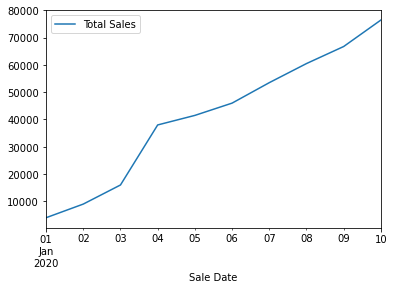

In [10]:
# Let's plot the total sales
sales_df.plot(x="Sale Date",y="Total Sales");
# select column in dataframe to display in x-axis and y-axis

# note: - these are not labeling

### Scatter Graphs

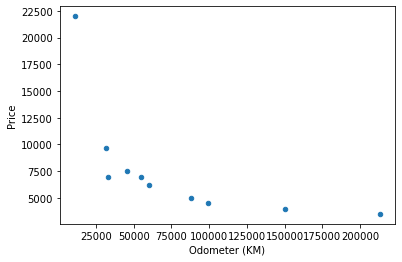

In [11]:
# change price column from str to int - also reassign
sales_df["Price"] = sales_df["Price"].astype(int)

sales_df.plot(x="Odometer (KM)",y="Price",kind="scatter");
# scatter requires y column to be int

### Bar Graphs

In [12]:
# Data - Dummy Data
x = np.random.rand(10,4)
x

array([[0.39304815, 0.54142037, 0.33722484, 0.16644195],
       [0.87741509, 0.12934215, 0.37492502, 0.14312986],
       [0.41275996, 0.13267426, 0.75689828, 0.71312559],
       [0.1275333 , 0.82725651, 0.83817476, 0.06405764],
       [0.30345091, 0.88094537, 0.23746337, 0.70357101],
       [0.79462769, 0.57741772, 0.8660996 , 0.52499346],
       [0.28313479, 0.14678457, 0.2932493 , 0.63660706],
       [0.92894156, 0.19588837, 0.12180572, 0.31620068],
       [0.03493786, 0.83628364, 0.35111694, 0.17748829],
       [0.81812101, 0.510653  , 0.43115965, 0.86786154]])

In [13]:
# Turn it into a dataframe 
df = pd.DataFrame(x,columns=["a","b","c","d"])
df

,a,b,c,d
0,0.393048,0.541420,0.337225,0.166442
1,0.877415,0.129342,0.374925,0.143130
2,0.412760,0.132674,0.756898,0.713126
3,0.127533,0.827257,0.838175,0.064058
4,0.303451,0.880945,0.237463,0.703571
5,0.794628,0.577418,0.866100,0.524993
6,0.283135,0.146785,0.293249,0.636607
7,0.928942,0.195888,0.121806,0.316201
8,0.034938,0.836284,0.351117,0.177488
9,0.818121,0.510653,0.431160,0.867862


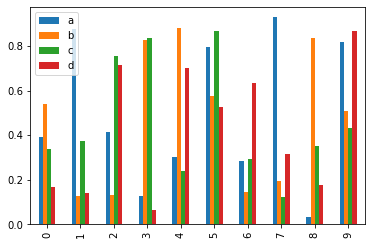

In [14]:
df.plot.bar();

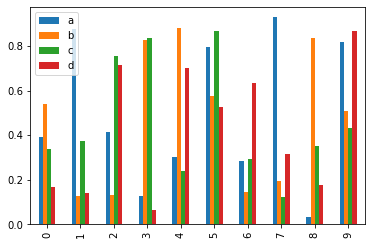

In [16]:
df.plot(kind="bar"); # same thing

In [17]:
# lets use our .csv data frame
sales_df

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


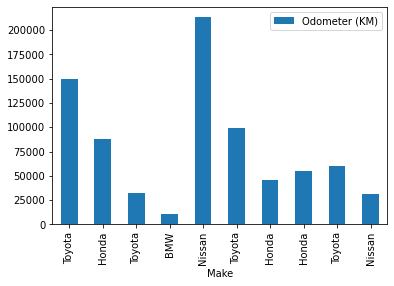

In [20]:
sales_df.plot(x="Make",y="Odometer (KM)",kind="bar");
# select column in dataframe to display in x-axis and y-axis

### Histogram

*) Great for visualizing distributions - i.e. spread of data

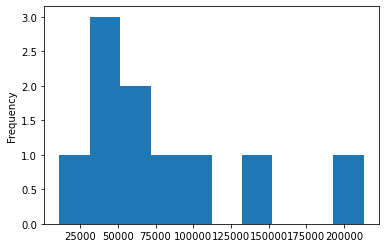

In [24]:
sales_df["Odometer (KM)"].plot(kind="hist");

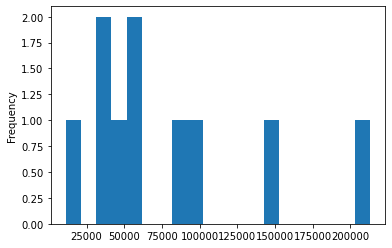

In [25]:
# bins() --> buckets on x-axis
# Bins are the number of intervals you want to divide all of your data into, such that it can be displayed as bars on a histogram
# A simple method to work our how many bins are suitable is to take the square root of the total number of values in your distribution

# whatever histogram does, it takes data and seperates them into bins

# Plotting a column
sales_df["Odometer (KM)"].plot.hist(bins=20);

In [26]:
### Lets take another .csv file

In [27]:
heart_df = pd.read_csv("heart-disease.csv")
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


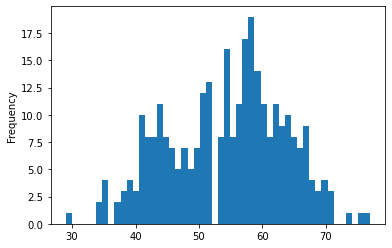

In [31]:
# Plotting a column - Histogram
heart_df["age"].plot.hist(bins=50);

### Subplots

In [32]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
# Lets plot all columns histogram in ONE PLOT

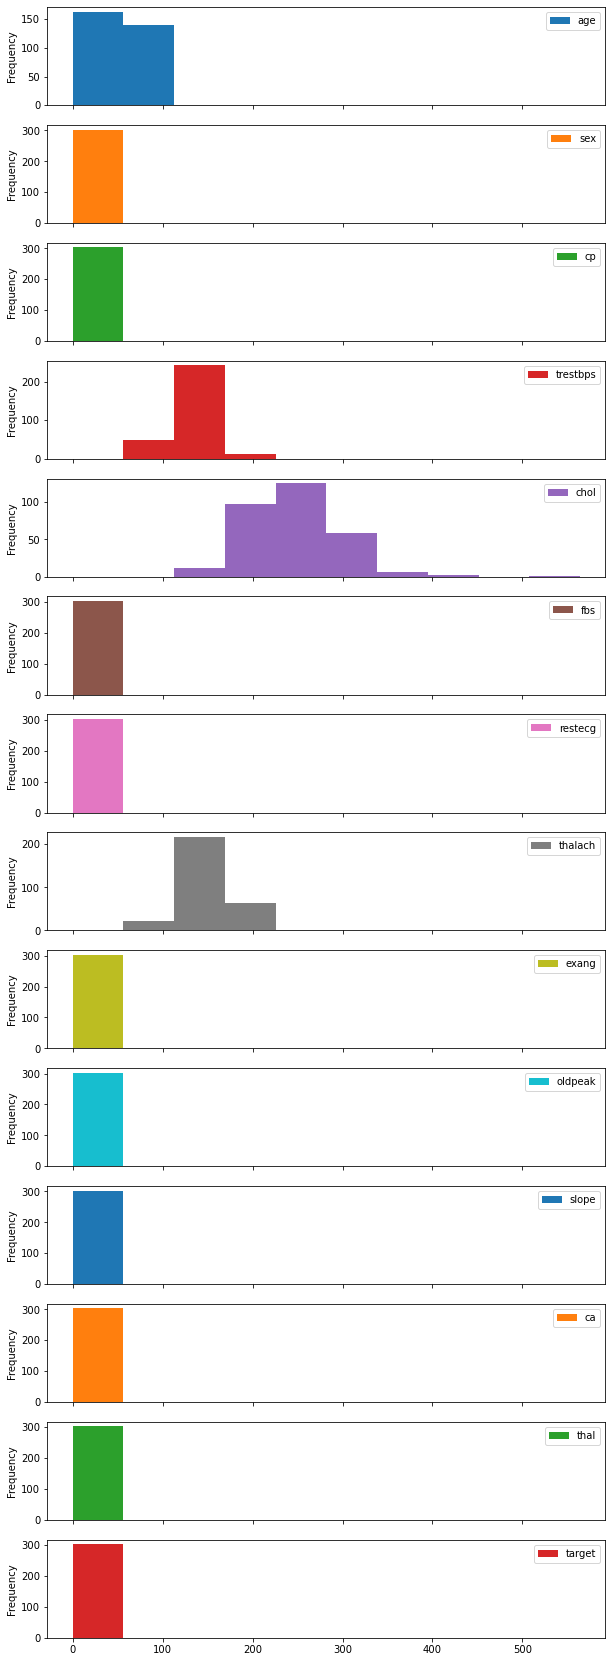

In [35]:
heart_df.plot.hist(
    figsize=(10,30), # widthxheight - dimensions
    subplots=True
);

In [ ]:
# ---------------------------------------------------